In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import os

from astropy.coordinates import SkyCoord
import astropy.units as u

In [7]:
scan = os.scandir('./data/candidates/lists/')
files = [f.path for f in scan if f.is_file() and f.name.endswith('.csv')]
files.sort()
files

['./data/candidates/lists/candidates_000-002.csv',
 './data/candidates/lists/candidates_000-002_2.csv',
 './data/candidates/lists/candidates_002-004.csv',
 './data/candidates/lists/candidates_002-004_2.csv',
 './data/candidates/lists/candidates_004-006.csv',
 './data/candidates/lists/candidates_004-006_2.csv',
 './data/candidates/lists/candidates_006-008.csv',
 './data/candidates/lists/candidates_006-008_2.csv',
 './data/candidates/lists/candidates_008-010.csv',
 './data/candidates/lists/candidates_008-010_2.csv',
 './data/candidates/lists/candidates_010-012.csv',
 './data/candidates/lists/candidates_010-012_2.csv',
 './data/candidates/lists/candidates_012-014.csv',
 './data/candidates/lists/candidates_012-014_2.csv',
 './data/candidates/lists/candidates_014-016.csv',
 './data/candidates/lists/candidates_014-016_2.csv',
 './data/candidates/lists/candidates_016-018.csv',
 './data/candidates/lists/candidates_016-018_2.csv',
 './data/candidates/lists/candidates_018-020.csv',
 './data/cand

In [8]:
df_candidates = None
for file in files[:]:
    df = pd.read_csv(file)
    if df_candidates is None:
        df_candidates = df
    else:
        df_candidates = pd.concat([df_candidates, df])
df_candidates

,source_id_smss,ra_smss,dec_smss,glon,glat,g_psf,e_g_psf,g_petro,e_g_petro,r_psf,...,source_id_wise,dist_wise2,ra_wise,dec_wise,w1mpro,w2mpro,w12mpro,w1mag,w2mag,w12mag
0,11448839,1.068573,-26.475366,33.803500,-79.4594,19.9968,0.0724,19.8421,0.0738,19.8015,...,0016m258_b0-004096,7.897690e-09,1.068612,-26.475286,15.834,14.896,0.938,15.765,14.779,0.986000
1,11448839,1.068573,-26.475366,33.803500,-79.4594,19.9968,0.0724,19.8421,0.0738,19.8015,...,0016m258_b0-004096,7.897690e-09,1.068612,-26.475286,15.834,14.896,0.938,15.765,14.779,0.986000
2,11878456,1.333985,-18.405084,69.946404,-76.2651,19.7624,0.1442,19.6319,0.0846,19.3069,...,0015m182_b0-002682,2.579869e-07,1.334353,-18.405434,15.321,14.560,0.761,15.233,14.450,0.783000
3,11878456,1.333985,-18.405084,69.946404,-76.2651,19.7624,0.1442,19.6319,0.0846,19.3069,...,0015m182_b0-002682,2.579869e-07,1.334353,-18.405434,15.321,14.560,0.761,15.233,14.450,0.783000
4,12759318,0.960456,-13.327338,81.711100,-72.2737,19.4886,0.1370,19.4883,0.0869,19.9878,...,0015m137_b0-009084,2.409410e-09,0.960453,-13.327387,16.521,15.664,0.857,16.447,15.576,0.871000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,490427380,358.340854,-45.148534,331.882000,-68.5760,18.8671,0.0970,18.6927,0.0401,18.3352,...,3578m455_b0-001735,2.530275e-07,358.341236,-45.148207,14.679,14.083,0.596,14.079,13.591,0.488001
82,1600085992,359.423126,-45.302920,329.937000,-68.9036,19.1999,0.2589,18.9388,0.0504,NaN,...,0000m455_b0-001943,5.358260e-08,359.423023,-45.302713,14.939,14.413,0.526,14.648,14.161,0.486999
83,1600085992,359.423126,-45.302920,329.937000,-68.9036,19.1999,0.2589,18.9388,0.0504,NaN,...,0000m455_b0-001943,5.358260e-08,359.423023,-45.302713,14.939,14.413,0.526,14.648,14.161,0.486999
84,1600085993,359.423080,-45.302638,329.937000,-68.9038,19.1052,0.3129,18.9083,0.0969,18.4597,...,0000m455_b0-001943,8.791400e-09,359.423023,-45.302713,14.939,14.413,0.526,14.648,14.161,0.486999


In [9]:
# df_candidates.to_csv('./data/candidates/candidates.csv', index=False)

In [3]:
df_candidates = pd.read_csv('./data/candidates/candidates2.csv')
gr = df_candidates.groupby('source_id_smss')
len(gr)

13576

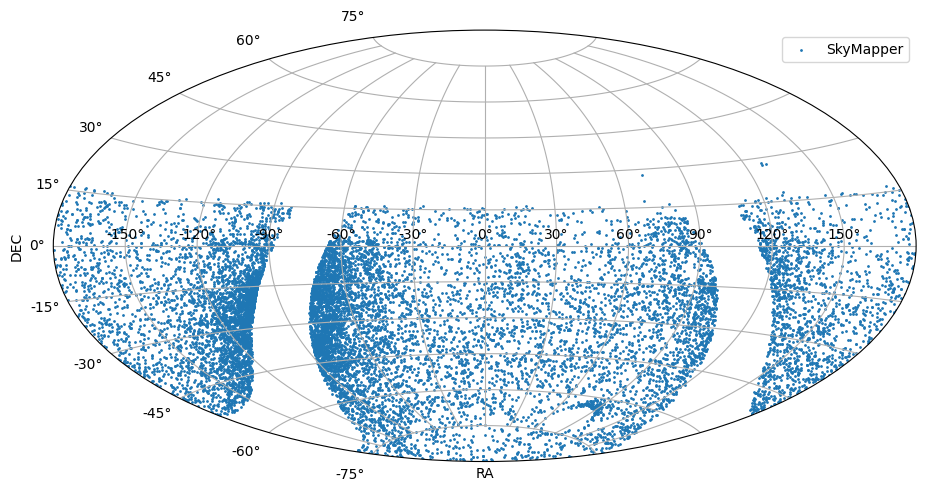

In [5]:
df_group = gr.first()
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, 
                 projection="aitoff"
                 )
coords = SkyCoord(ra=df_group['ra_smss'], dec=df_group['dec_smss'], unit=(u.deg, u.deg))
ax.scatter(coords.ra.wrap_at(180 * u.deg).radian, coords.dec.radian, 
           label='SkyMapper', s=1)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.savefig('./figs/candidates2_sky.png')
plt.show()

# Compare with known sources

In [14]:
df_known = pd.read_csv('./data/known_gls.csv')
coords_known = SkyCoord(ra=df_known['RA'], dec=df_known['DEC'], unit=(u.deg, u.deg))
print('Possible observed:', df_known.__len__() - df_known['smss'].sum())
coords_candidates = SkyCoord(ra=df_group['ra_smss'], 
                             dec=df_group['dec_smss'], unit=(u.deg, u.deg))

idx, d2d, _ = coords_known.match_to_catalog_sky(coords_candidates)
max_sep = 2.0 * u.arcsec
sep_constraint = d2d < max_sep
idx_known = idx[sep_constraint]
df_known['idx'] = idx
df_known['source_id_smss'] = df_group.index[idx]
df_known['d2d'] = d2d.to(u.arcsec).value
print('Included in the list of candidates:', df_known[sep_constraint].__len__())
df_known[sep_constraint]

Possible observed: 116
Included in the list of candidates: 51


,RA,DEC,Name,z_qso,z_lens,separation,N_images,W1,W2,smss,idx,source_id_smss,d2d
0,2.834350,-8.764300,J0011-0845,1.7,-,1.89,2,15.190,14.455,False,688,12888835,0.514375
2,7.093690,6.531700,PSJ0028+0631,1.06,-,2.81,2,14.160,13.363,False,12569,2032260711,0.147643
3,7.563600,-15.417700,PSJ0030-1525,3.36,measured,1.78,4,14.312,13.761,False,628,12127408,0.596367
6,13.434900,-20.209100,DESJ0053-2012,3.8,observed,3.06,4,14.562,14.012,False,600,11852332,1.172783
8,18.141188,-16.840955,DESJ0112-1650,0.99,0.54,1.38,2,14.356,13.692,False,661,12523414,0.329055
18,26.636900,-11.560800,J0146-1133,1.44,-,1.68,2,14.174,13.078,False,823,14883457,0.699561
20,27.737200,-40.695600,DESJ0150-4041,1.85,-,2.81,2,14.593,13.974,False,495,10435743,0.479606
21,29.672400,-43.417800,QJ0158-4325,1.29,0.317,1.22,2,13.795,12.612,False,9443,504919243,0.505870
27,38.138290,-21.290460,HE0230-2130,2.162,0.523,2.05,4,14.018,12.985,False,803,14573723,0.873987
28,38.864200,-24.553800,J0235-2433,1.44,-,2.04,2,14.002,13.024,False,569,11345938,0.269011


In [18]:
def plot_candidates(frame, issave=False, folder='./data/candidates/astrometry2/'):
    coord_icrs = SkyCoord(ra=frame['ra_smss'].values[0]*u.degree, dec=frame['dec_smss'].values[0]*u.degree, frame='icrs')
    print(f'ra, dec: {coord_icrs.ra.deg:.6f} {coord_icrs.dec.deg:.6f}')
    print('Mag (i, g, w1): ', frame['i_petro'].values[0], frame['g_psf'].values[0], 
          frame['w1mpro'].values[0], frame['w2mpro'].values[0])
    coord_galactic = coord_icrs.transform_to('galactic')
    print(f'Galactic (l, b): {coord_galactic.l.deg:.6f} {coord_galactic.b.deg:.6f}')
    # print('Gaia id, SkyMapper id :', frame['source_id_gaia'].values[0], frame['source_id_smss'].values[0])
    print(coord_icrs.to_string('hmsdms'))
    
    plt.figure(figsize=(5, 5))
    ra = frame['ra_smss'].values[0]
    dec = frame['dec_smss'].values[0]
    plt.scatter(frame['ra_smss'], frame['dec_smss'], label='SkyMapper')
    plt.scatter(frame['ra_wise'], frame['dec_wise'], label='WISE')
    plt.scatter(frame['ra_gaia'], frame['dec_gaia'], label='Gaia')
    for i in range(len(frame)):
        plt.arrow(frame['ra_gaia'].values[i], frame['dec_gaia'].values[i], 
                  frame['pmra'].values[i]/3600/np.cos(np.deg2rad(frame['dec_gaia'].values[i])), 
                  frame['pmdec'].values[i]/3600,
                  width=0.000001,
                  head_width=0.00005, 
                  head_length=0.00005,
                  fc='k', ec='k'
                  )
        plt.annotate(i, (frame['ra_gaia'].values[i], frame['dec_gaia'].values[i]))
        print('Gaia pmra, pmdec, pm:', frame['pmra'].values[i], frame['pmdec'].values[i], frame['pm'].values[i])
    plt.xlabel('RA')
    plt.ylabel('DEC')
    l = 4.0
    r1, r2 = 3, 1
    plt.xlim(frame['ra_smss'].values[0]-l/3600/np.cos(np.deg2rad(frame['dec_smss'].values[0])), 
             frame['ra_smss'].values[0]+l/3600/np.cos(np.deg2rad(frame['dec_smss'].values[0])))
    plt.ylim(frame['dec_smss'].values[0]-l/3600, frame['dec_smss'].values[0]+l/3600)
    ell = Ellipse((frame['ra_smss'].values[0], frame['dec_smss'].values[0]), 
                  width=2*r1/3600/np.cos(np.deg2rad(frame['dec_smss'].values[0])), height=2*r1/3600,
                    edgecolor='red', facecolor='none')
    plt.gca().add_artist(ell)
    ell = Ellipse((frame['ra_smss'].values[0], frame['dec_smss'].values[0]),
                    width=2*r2/3600/np.cos(np.deg2rad(frame['dec_smss'].values[0])), height=2*r2/3600,
                        edgecolor='orange', facecolor='none')
    plt.gca().add_artist(ell)
    plt.legend()
    plt.grid(alpha=0.2)
    plt.title(f'{frame["source_id_smss"].values[0]}, {ra:.6f}, {dec:.6f}')
    if issave:
        file = os.path.join(folder, f'{frame["source_id_smss"].values[0]} {ra:.6f} {dec:.6f}.png')
        plt.savefig(file)
        plt.close()
    else:
        plt.show()

In [19]:
count = 0
df = None
cond = df_known['d2d'] < 2.0
for name, group in gr:
    if (name in df_known.loc[cond, 'source_id_smss'].values) :
    # if (group.shape[0] > 2) & (group['glat'].abs() > 15).all():
    # & (group['pm'] < 1.0).all() & (group['dist_wise2'] < 1.0/3600.0).all():
        print(name)
        plot_candidates(group, issave=True, folder='./data/known/astrometry2/')
        count += 1
    else:
        continue
count


1495928
ra, dec: 333.410097 -26.874209
Mag (i, g, w1):  17.1307 17.6616 14.074 12.866
Galactic (l, b): 24.084013 -54.998356
22h13m38.42328s -26d52m27.1524s
Gaia pmra, pmdec, pm: 0.227294966226 0.123264356562626 0.258567
Gaia pmra, pmdec, pm: -0.0080485758033882 -0.034842886436831 0.03576
2868665
ra, dec: 346.828751 -30.654387
Mag (i, g, w1):  18.1754 18.2776 14.871 14.165
Galactic (l, b): 17.912464 -66.990709
23h07m18.90024s -30d39m15.7932s
Gaia pmra, pmdec, pm: -0.2587447282130522 0.160879744194572 0.304682
Gaia pmra, pmdec, pm: -0.2627700843327793 -0.010062589117119 0.262963
5453135
ra, dec: 326.691830 -0.795765
Mag (i, g, w1):  19.414 19.5158 15.53 14.727
Galactic (l, b): 55.745056 -38.508824
21h46m46.0392s -00d47m44.754s
Gaia pmra, pmdec, pm: 1.0503423505042817 -0.5463711153222912 1.183951
Gaia pmra, pmdec, pm: 1.897196111585252 0.4404759445015242 1.947658
6644610
ra, dec: 353.080482 -18.868609
Mag (i, g, w1):  18.3519 19.3984 14.534 13.641
Galactic (l, b): 53.193381 -70.042112
23h

51

In [31]:
# df_known['idx'].values
type(name)

int

In [30]:
group['glat'].all()

np.True_

In [19]:
gr_df = df.groupby('source_id_smss')

def sep(x):
    coord1 = SkyCoord(ra=x['ra_gaia'].values[0]*u.degree, dec=x['dec_gaia'].values[0]*u.degree, frame='icrs')
    coord2 = SkyCoord(ra=x['ra_gaia'].values[1]*u.degree, dec=x['dec_gaia'].values[1]*u.degree, frame='icrs')
    return coord1.separation(coord2).arcsecond

s = gr_df.apply(lambda x: sep(x))
s

/var/folders/z7/xdmr6nzd7tbdjw0hjsyc05l00000gn/T/ipykernel_46525/438593539.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  s = gr_df.apply(lambda x: sep(x))


source_id_smss
20250841    2.836771
20392389    2.040154
20858743    0.523865
21535113    1.789820
22097175    0.269461
22623459    1.782772
23508913    2.246863
29817015    2.438913
30641002    2.892344
30885280    1.443031
32207777    2.845683
34036951    1.379390
42286826    1.008171
48746526    4.271357
49948144    2.647666
50647174    2.832081
72653799    1.284266
72702059    3.851970
73880890    2.062401
74083729    1.262998
74271765    3.187259
dtype: float64

In [20]:
s.hist(bins=20)


NameError: name 's' is not defined

In [ ]:
cond.sum()

np.int64(0)

In [ ]:
group.shape[0]

2